**Table of contents**<a id='toc0_'></a>    
- [Missing Values](#toc1_)    
- [Decision metrics](#toc2_)    
- [Source Page Metrics](#toc3_)    
- [Disclosed indicators](#toc4_)    
- [Metrics](#toc5_)    
  - [Faithfulness](#toc5_1_)    
  - [Context relevancy](#toc5_2_)    
  - [Correctness](#toc5_3_)    
  - [Semantic Similarity](#toc5_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
llama2 = pd.read_excel('./data/hm_llama2_topk8_paramsall.xlsx')
llama2.drop(["Unnamed: 0"], axis=1, inplace=True)

llama3 = pd.read_excel('./data/hm_llama3_instruct_topk8_paramsall.xlsx')
llama3.drop(["Unnamed: 0"], axis=1, inplace=True)

mistral = pd.read_excel('./data/hm_mistral_topk8_paramsall.xlsx')
mistral.drop(["Unnamed: 0"], axis=1, inplace=True)

phi3 = pd.read_excel('./data/hm_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3.drop(["Unnamed: 0"], axis=1, inplace=True)

gpt = pd.read_excel('./data/hm_gpt-4o_topk8_paramsall.xlsx')
gpt.drop(["Unnamed: 0"], axis=1, inplace=True)

# <a id='toc1_'></a>[Missing Values](#toc0_)

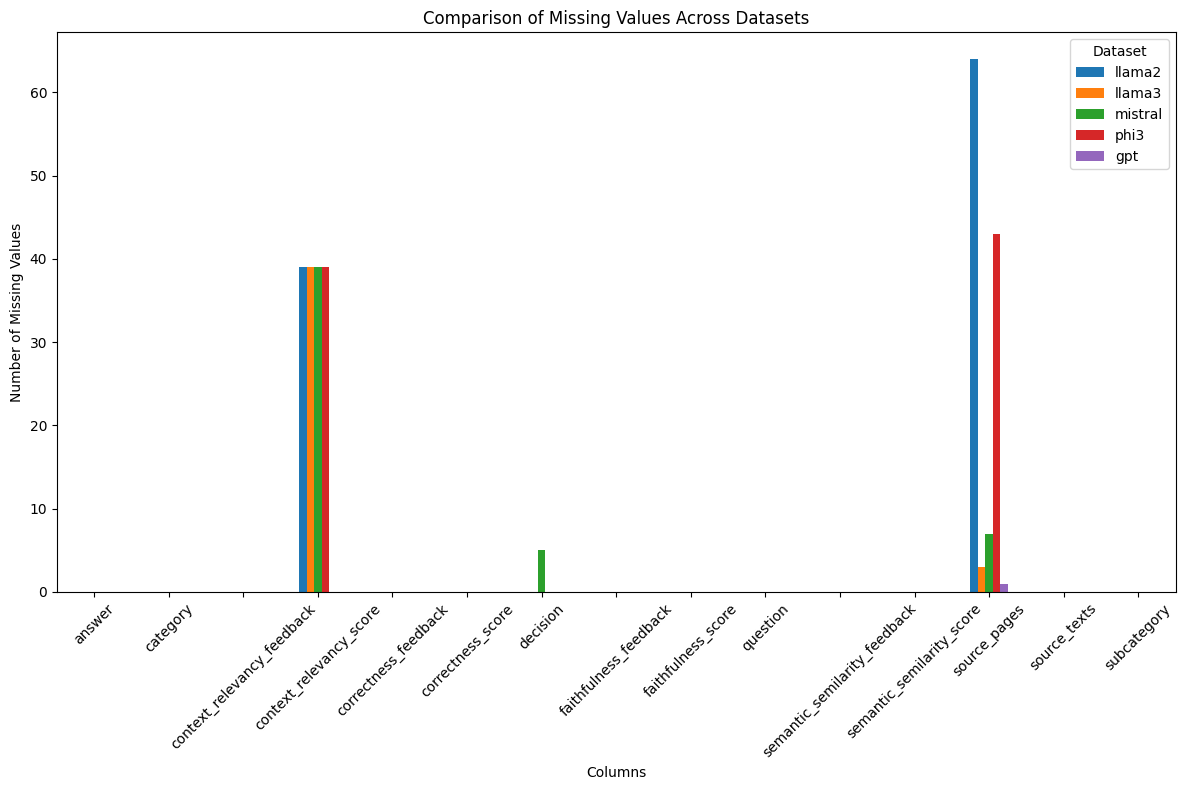

In [4]:
llama2_missing = llama2.isna().sum()
llama3_missing = llama3.isna().sum()
mistral_missing = mistral.isna().sum()
phi3_missing = phi3.isna().sum()
gpt_missing = gpt.isna().sum()


missing_comparison = pd.DataFrame({
    'llama2': llama2_missing,
    'llama3': llama3_missing,
    'mistral': mistral_missing,
    'phi3': phi3_missing,
    'gpt': gpt_missing
}).reset_index()

missing_comparison.columns = ['Column', 'llama2', 'llama3', 'mistral', 'phi3', "gpt"]

missing_comparison.plot(x='Column', kind='bar', figsize=(12, 8))
plt.title('Comparison of Missing Values Across Datasets')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

llama2 fails to give a single source page

# <a id='toc2_'></a>[Decision metrics](#toc0_)

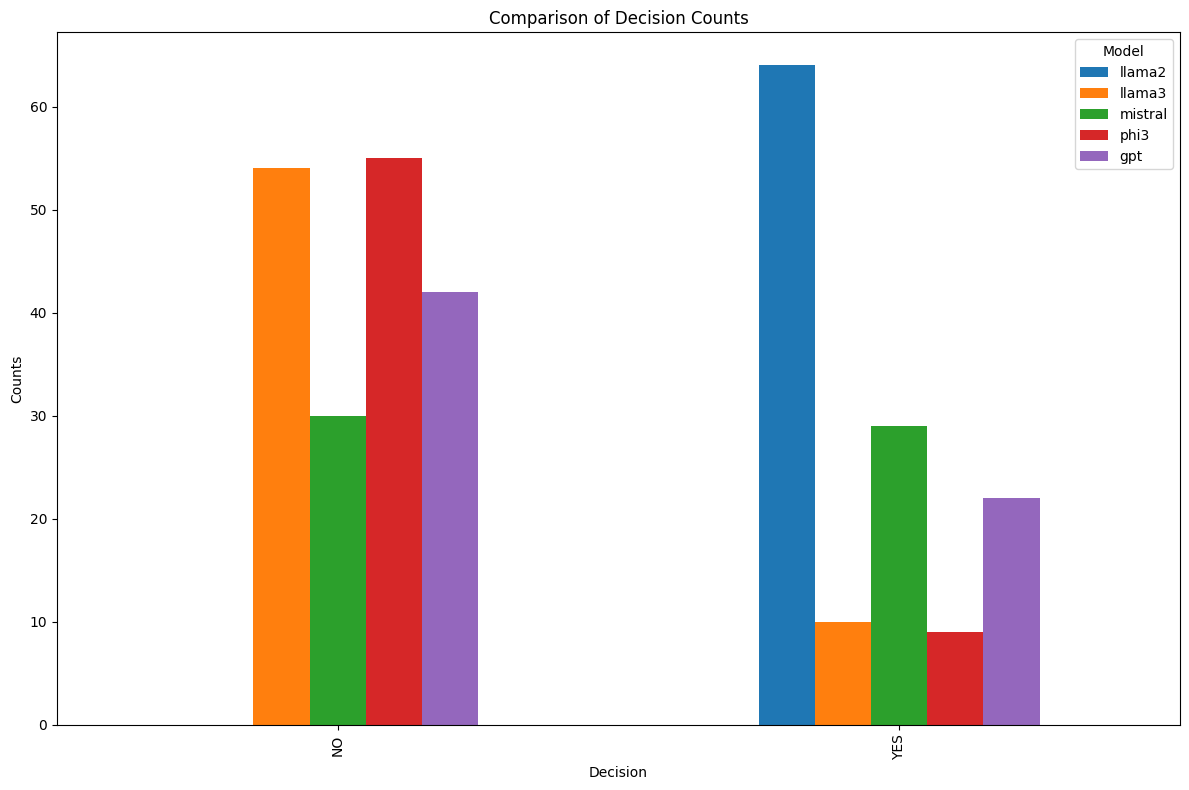

In [5]:

llama2_decision_counts = llama2['decision'].value_counts()
llama3_decision_counts = llama3['decision'].value_counts()
mistral_decision_counts = mistral['decision'].value_counts()
phi3_decision_counts = phi3['decision'].value_counts()
gpt_decision_counts = gpt['decision'].value_counts()


decision_comparison_df = pd.DataFrame({
    'llama2': llama2_decision_counts,
    'llama3': llama3_decision_counts,
    'mistral': mistral_decision_counts,
    'phi3': phi3_decision_counts,
    "gpt" : gpt_decision_counts
})

decision_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Decision Counts')
plt.xlabel('Decision')
plt.ylabel('Counts')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('./hm_comparison_decision.jpg')
plt.show()

In [6]:
mistral_missing_indices = mistral[mistral['decision'].isna()].index.tolist()
print("Indices of missing decisions in mistral:", mistral_missing_indices)
mistral_missing_entries = mistral.loc[mistral_missing_indices]
mistral_missing_entries.head(5)

Indices of missing decisions in mistral: [1, 10, 11, 16, 45]


,category,subcategory,question,decision,answer,source_pages,source_texts,faithfulness_score,faithfulness_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,semantic_semilarity_score,semantic_semilarity_feedback
1,target,headline,If the company communicates GHG emission inten...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...,0,NO,0.375,**Evaluation**\n\n1. Does the retrieved contex...,4.0,The generated answer is relevant and mostly co...,0.843252,Similarity score: 0.843251629653232
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: No new or amen...,0,NO,NaN,Evaluation:\n\n1. Does the retrieved context m...,4.0,The generated answer is highly relevant to the...,0.828954,Similarity score: 0.8289540975904326
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: The contracts ...,0,NO,0.375,**Evaluation of Retrieved Context**\n\nTo eval...,4.0,The generated answer is relevant to the user q...,0.869656,Similarity score: 0.8696562793457798
16,governance,accountability,Does the company report how its board oversees...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 38: In addition, a...",0,NO,NaN,Evaluation of the retrieved context:\n\n**Ques...,4.0,The generated answer is relevant to the user q...,0.826355,Similarity score: 0.8263550176798365
45,tracking,emissions,Does the company report its scope 1 GHG emissi...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4...",0,NO,NaN,Evaluation:\n\n1. Does the retrieved context m...,3.0,The generated answer is relevant to the user q...,0.792514,Similarity score: 0.7925138247513072


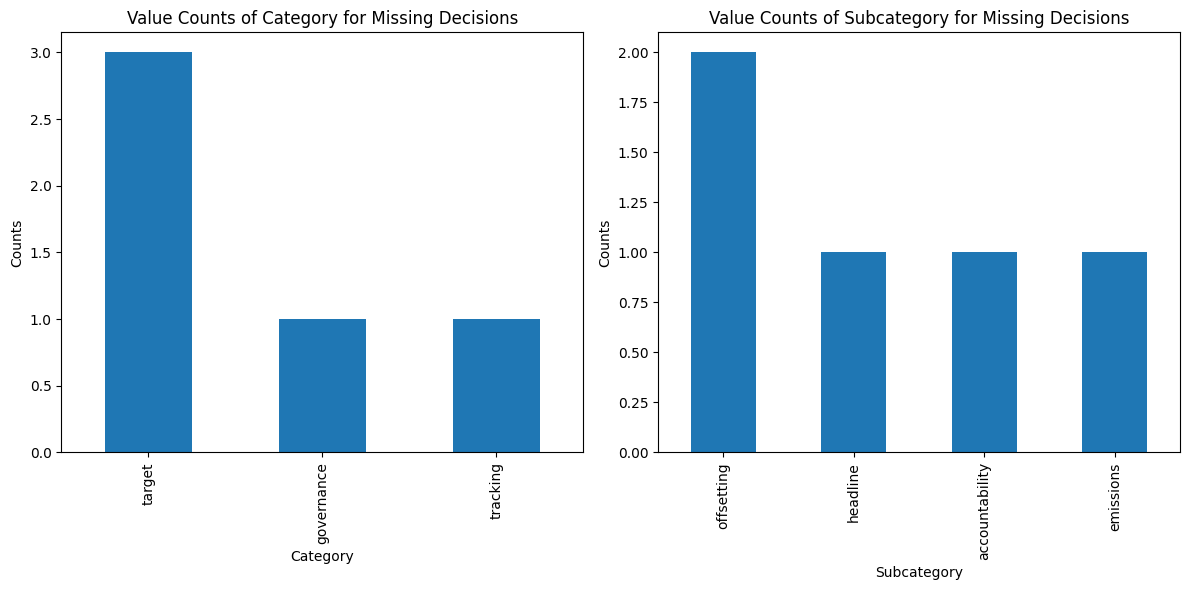

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc3_'></a>[Source Page Metrics](#toc0_)

In [8]:
llama3_missing_source = llama3[llama3["source_pages"].isna()].index
mistral_missing_source = mistral[mistral["source_pages"].isna()].index
phi3_missing_source = phi3[phi3["source_pages"].isna()].index
gpt_missing_source = gpt[gpt["source_pages"].isna()].index

In [9]:
print(f"# missing source page entries for llama3: {len(llama3_missing_source)}")
print(f"# missing source page entries for mistral: {len(mistral_missing_source)}")
print(f"# missing source page entries for phi3: {len(phi3_missing_source)}")
print(f"# missing source page entries for gpt: {len(gpt_missing_source)}")

# missing source page entries for llama3: 3
# missing source page entries for mistral: 7
# missing source page entries for phi3: 43
# missing source page entries for gpt: 1


In [10]:
llama3.iloc[llama3_missing_source].sample(3)

,category,subcategory,question,decision,answer,source_pages,source_texts,faithfulness_score,faithfulness_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,semantic_semilarity_score,semantic_semilarity_feedback
32,strategy,engagement,Does the company report a strategy with specif...,NO,The company does not report a specific strateg...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...,0,NO,NaN,Evaluation of the retrieved context:\n\n**Ques...,4.0,The generated answer is highly relevant to the...,0.832509,Similarity score: 0.8325085618579704
7,target,coverage,Does the company report its absolute emission ...,NO,The company reports a combined target for scop...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4...",1,YES,NaN,Evaluation:\n\n1. Does the retrieved context m...,4.5,The generated answer is highly relevant to the...,0.814977,Similarity score: 0.8149766589794578
26,strategy,production,Does the company report a strategy and activit...,NO,"Upon reviewing the report, I did not find spec...",NaN,[BEGIN OF SOURCES]\n\nPAGE 40: —Innovation : ...,0,NO,NaN,Evaluation of the retrieved context:\n\n**Ques...,4.0,The generated answer is highly relevant to the...,0.831462,Similarity score: 0.831461867245759


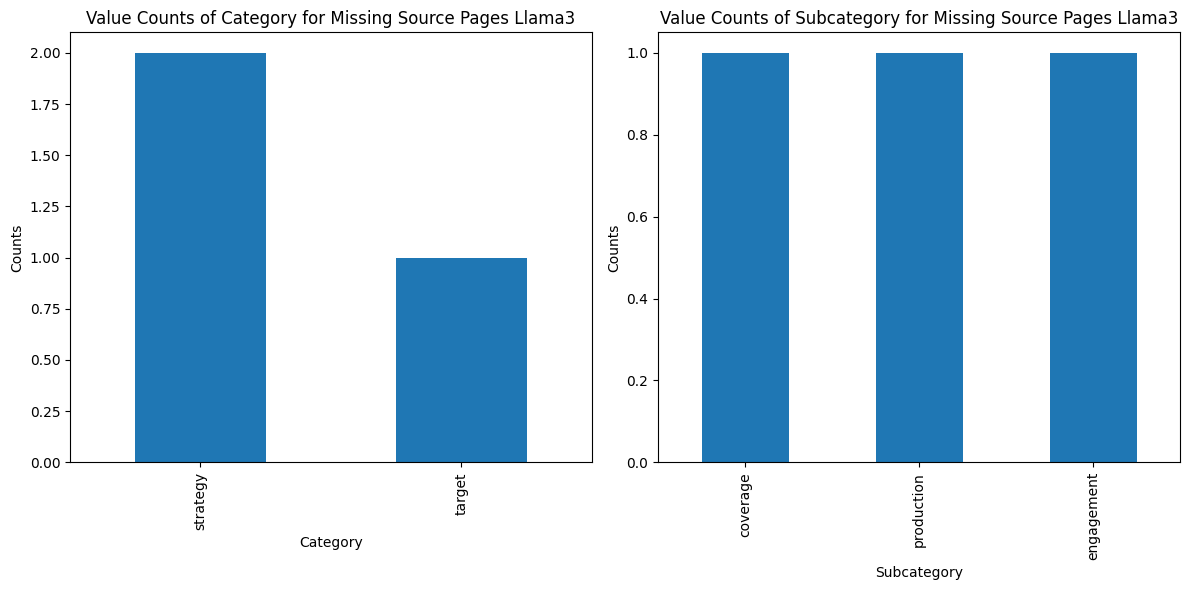

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
llama3.iloc[llama3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Llama3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
llama3.iloc[llama3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Llama3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [12]:
mistral.iloc[mistral_missing_source].sample(7)

,category,subcategory,question,decision,answer,source_pages,source_texts,faithfulness_score,faithfulness_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,semantic_semilarity_score,semantic_semilarity_feedback
16,governance,accountability,Does the company report how its board oversees...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 38: In addition, a...",0,NO,NaN,Evaluation of the retrieved context:\n\n**Ques...,4.0,The generated answer is relevant to the user q...,0.826355,Similarity score: 0.8263550176798365
35,strategy,engagement,Does the company report serious consequences a...,NO,The report does not provide specific informati...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: packaging and ...,0,NO,NaN,Evaluation of the retrieved context:\n\n**Ques...,4.0,The generated answer accurately reflects the i...,0.751372,Similarity score: 0.7513720189735055
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: No new or amen...,0,NO,NaN,Evaluation:\n\n1. Does the retrieved context m...,4.0,The generated answer is highly relevant to the...,0.828954,Similarity score: 0.8289540975904326
45,tracking,emissions,Does the company report its scope 1 GHG emissi...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 19: 839 7,93 6 7,4...",0,NO,NaN,Evaluation:\n\n1. Does the retrieved context m...,3.0,The generated answer is relevant to the user q...,0.792514,Similarity score: 0.7925138247513072
1,target,headline,If the company communicates GHG emission inten...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...,0,NO,0.375,**Evaluation**\n\n1. Does the retrieved contex...,4.0,The generated answer is relevant and mostly co...,0.843252,Similarity score: 0.843251629653232
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 54: The contracts ...,0,NO,0.375,**Evaluation of Retrieved Context**\n\nTo eval...,4.0,The generated answer is relevant to the user q...,0.869656,Similarity score: 0.8696562793457798
37,strategy,fossil fuels,Does the company report a strategy and activit...,NO,The report does not provide evidence of a comm...,NaN,[BEGIN OF SOURCES]\n\nPAGE 22: We used prefer...,0,NO,0.375,Evaluation:\n\n**Question 1: Does the retrieve...,4.0,The generated answer accurately reflects the i...,0.821343,Similarity score: 0.8213433037659125


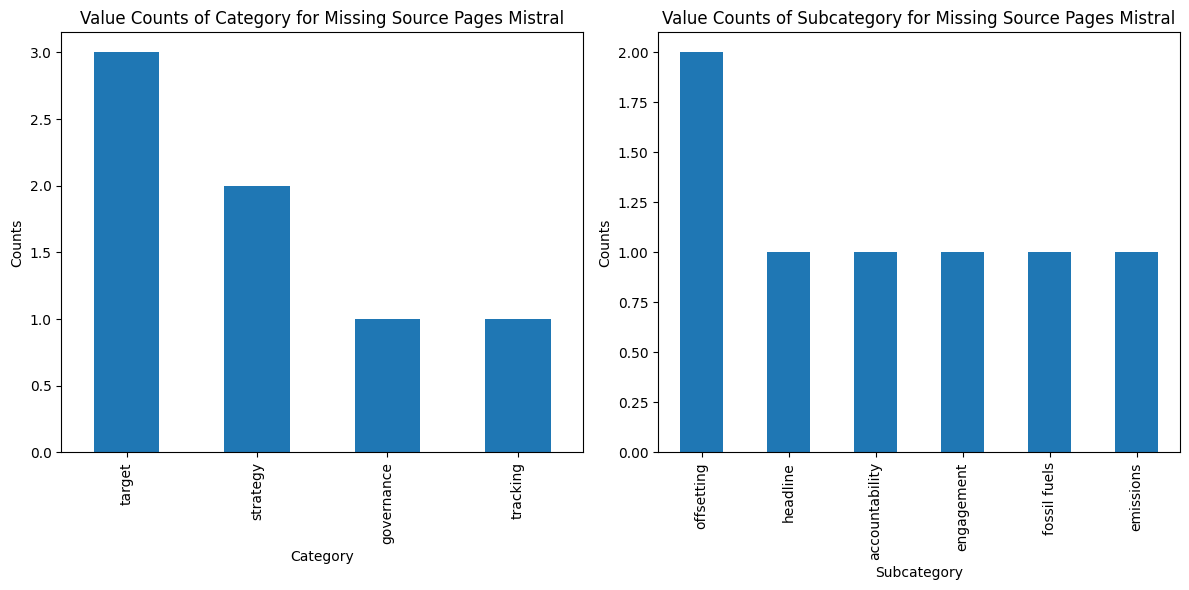

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral.iloc[mistral_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Mistral')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral.iloc[mistral_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Mistral')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [14]:
phi3.iloc[phi3_missing_source].sample(10)

,category,subcategory,question,decision,answer,source_pages,source_texts,faithfulness_score,faithfulness_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,semantic_semilarity_score,semantic_semilarity_feedback
28,strategy,planning,Does the company report its capex planning to ...,NO,The provided sources do not contain specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 39: An innovative ...,0,NO,NaN,To evaluate if the retrieved context from the ...,4.5,The generated answer is highly relevant to the...,0.789721,Similarity score: 0.7897206582497704
9,target,pathway,Does the company state explicitly that the int...,NO,The company does not explicitly state that the...,NaN,[BEGIN OF SOURCES]\n\nPAGE 16: Until this wor...,0,NO,NaN,Evaluation of the retrieved context:\n\n**Ques...,4.0,The generated answer is highly relevant to the...,0.752014,Similarity score: 0.7520138294148296
63,tracking,engagement,Does the company report its engagement activit...,NO,The provided sources do not contain any specif...,NaN,[BEGIN OF SOURCES]\n\nPAGE 60: GROUP PARENT C...,0,NO,NaN,Evaluation of the retrieved context:\n\n1. Doe...,4.0,The generated answer is highly relevant to the...,0.668667,Similarity score: 0.6686672572391982
59,tracking,capex,Does the company report the amount of climate ...,NO,The company's report does not explicitly menti...,NaN,[BEGIN OF SOURCES]\n\nPAGE 20: —We developed ...,0,NO,0.375,To evaluate the relevance of the retrieved con...,4.0,The generated answer is highly relevant and ac...,0.793180,Similarity score: 0.7931803778975018
57,tracking,progress,Does the company report annual progress agains...,NO,The provided sources do not mention any specif...,NaN,[BEGIN OF SOURCES]\n\nPAGE 24: colleagues and...,0,NO,NaN,Evaluation:\n\n1. Does the retrieved context m...,4.0,The generated answer accurately reflects the l...,0.779435,Similarity score: 0.7794354241532233
26,strategy,production,Does the company report a strategy and activit...,NO,The company report does not provide specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 40: —Innovation : ...,0,NO,NaN,Evaluation of the retrieved context:\n\n**Ques...,4.5,The generated answer accurately reflects the i...,0.828240,Similarity score: 0.8282397316536959
17,governance,accountability,Does the company report that it ensures that t...,NO,The provided sources do not explicitly state t...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 38: In addition, a...",0,NO,0.750,Evaluation:\n\n1. Does the retrieved context m...,4.0,The generated answer is relevant to the user q...,0.716711,Similarity score: 0.7167106544535246
55,tracking,progress,Does the company report a decline in its scope...,NO,The provided sources do not provide specific q...,NaN,[BEGIN OF SOURCES]\n\nPAGE 42: –Our absolute ...,1,YES,NaN,To evaluate the relevance of the retrieved con...,4.0,The generated answer accurately reflects that ...,0.756371,Similarity score: 0.7563705494937604
14,governance,skills,Does the company report its available inhouse ...,NO,The provided sources do not contain any specif...,NaN,[BEGIN OF SOURCES]\n\nPAGE 39: An innovative ...,0,NO,NaN,Evaluation of the retrieved context:\n\n1. Doe...,4.0,The generated answer is highly relevant to the...,0.683628,Similarity score: 0.6836282474221441
8,target,pathway,Does the company report its GHG emission reduc...,NO,The provided sources do not explicitly mention...,NaN,[BEGIN OF SOURCES]\n\nPAGE 7: H&M Group’s goa...,1,YES,0.875,**Evaluation**\n\n1. Does the retrieved contex...,4.0,The generated answer is highly relevant to the...,0.817320,Similarity score: 0.8173198189034674


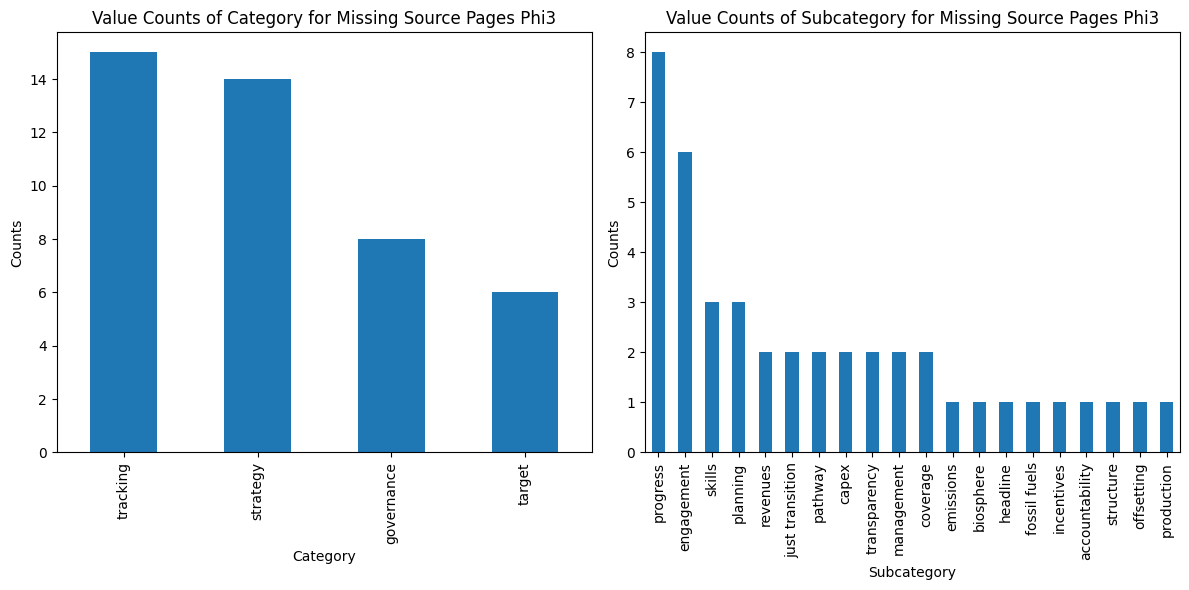

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
phi3.iloc[phi3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Phi3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
phi3.iloc[phi3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Phi3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [16]:
gpt.iloc[gpt_missing_source].sample(1)

,category,subcategory,question,decision,answer,source_pages,source_texts
63,tracking,engagement,Does the company report its engagement activit...,NO,[[NO]] The report does not provide any specifi...,NaN,[BEGIN OF SOURCES]\n\nPAGE 60: GROUP PARENT C...


In [17]:
overlap_all = set(llama3_missing_source).intersection(set(mistral_missing_source), set(phi3_missing_source))
overlap_llama3_mistral = set(llama3_missing_source).intersection(set(mistral_missing_source))
overlap_llama3_phi3 = set(llama3_missing_source).intersection(set(phi3_missing_source))
overlap_mistral_phi3 = set(mistral_missing_source).intersection(set(phi3_missing_source))

print("Values overlapping in all three lists:", overlap_all)
print("Values overlapping between llama3 and mistral:", overlap_llama3_mistral)
print("Values overlapping between llama3 and phi3:", overlap_llama3_phi3)
print("Values overlapping between mistral and phi3:", overlap_mistral_phi3)

Values overlapping in all three lists: set()
Values overlapping between llama3 and mistral: set()
Values overlapping between llama3 and phi3: {32, 26}
Values overlapping between mistral and phi3: {1, 10, 35, 37}


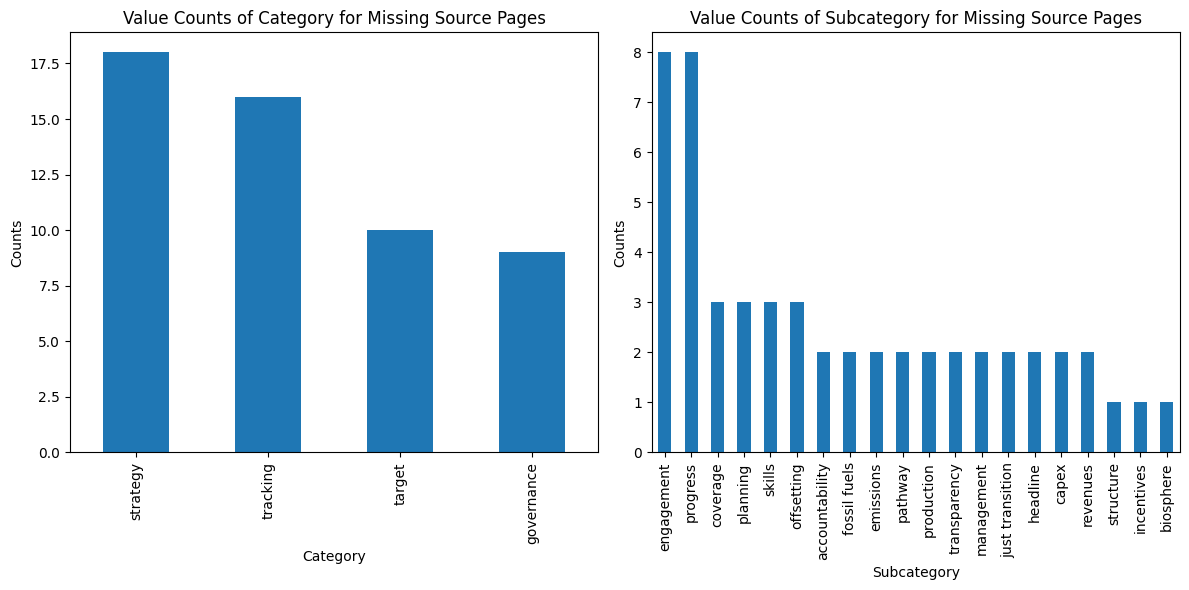

In [18]:
concatenated_missing_source_page = pd.concat([llama3.iloc[llama3_missing_source], mistral.iloc[mistral_missing_source], phi3.iloc[phi3_missing_source]], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
concatenated_missing_source_page['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
concatenated_missing_source_page['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Disclosed indicators](#toc0_)

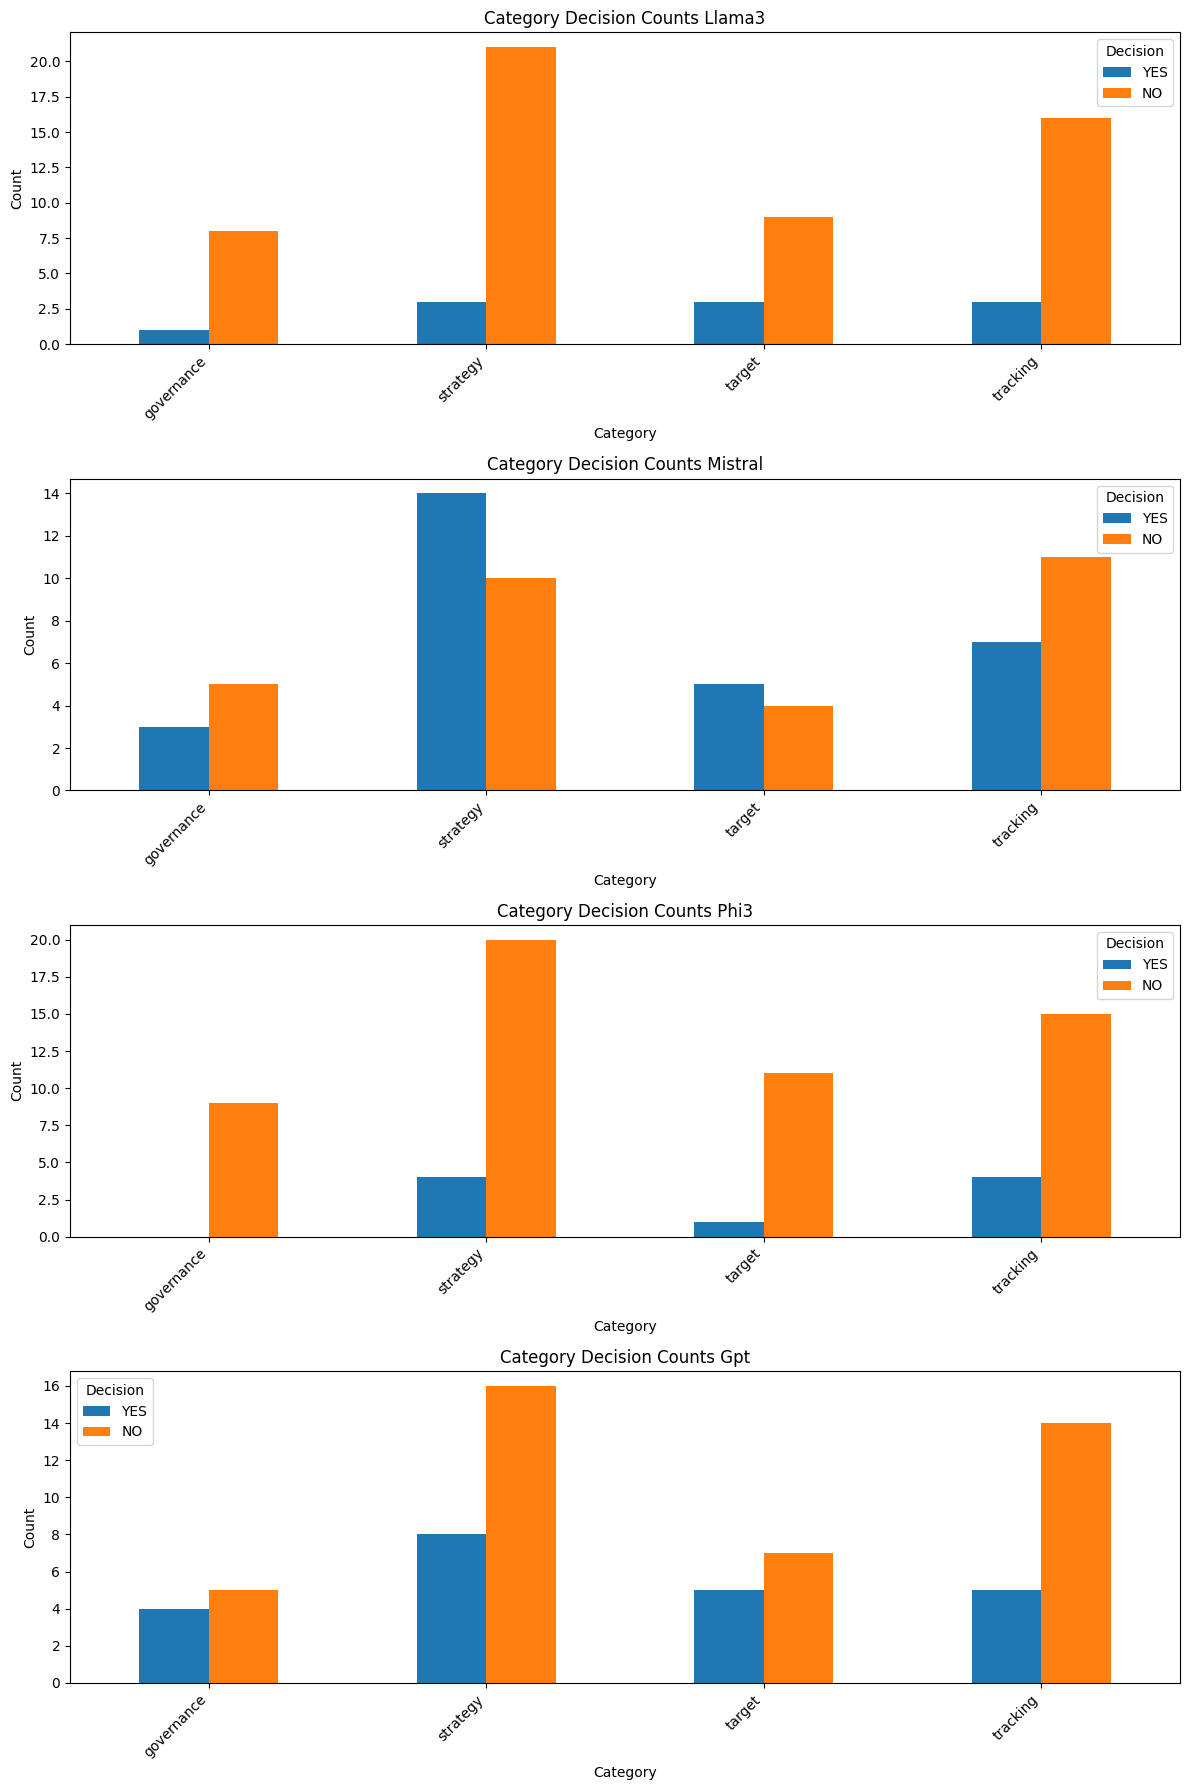

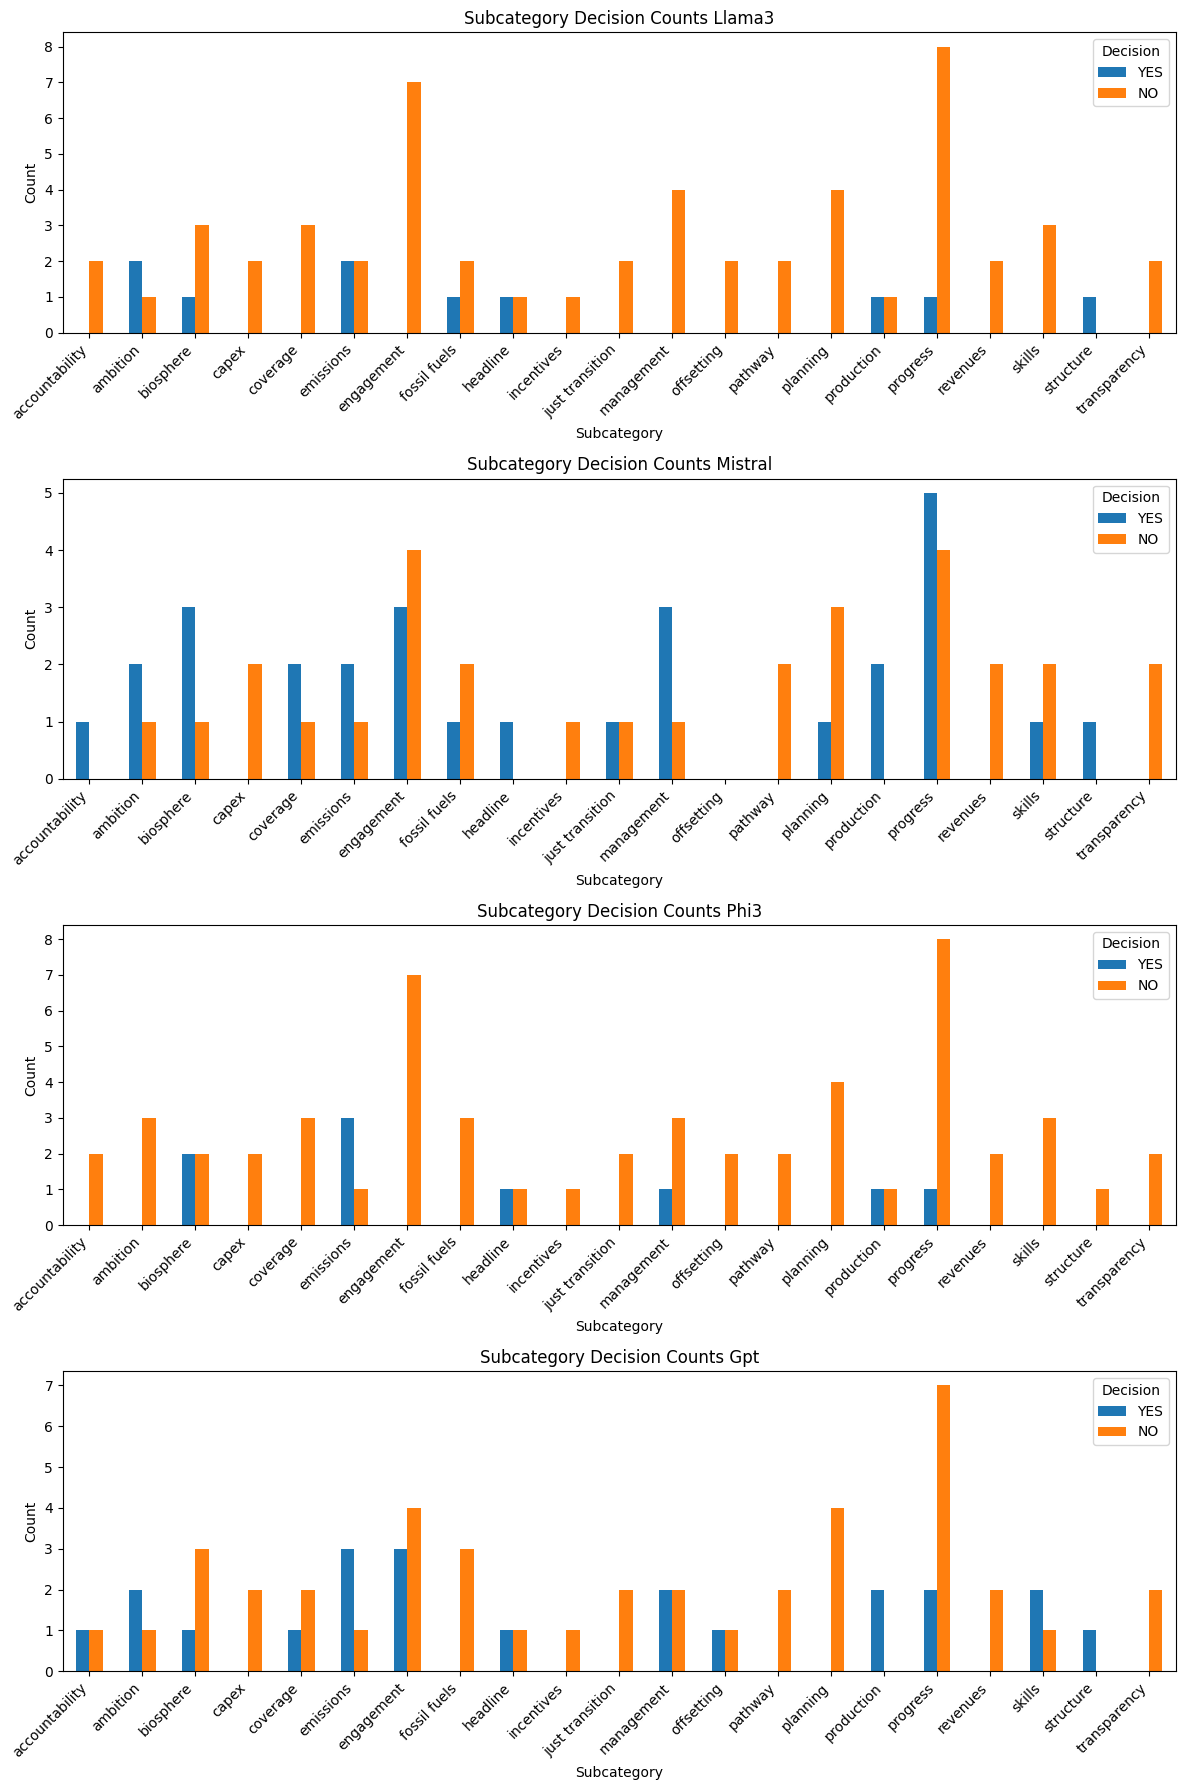

In [19]:
def plot_counts(data, title, ax, column_name, order):
    yes_counts = data[[column_name, "decision"]][data["decision"] == "YES"][column_name].value_counts()
    no_counts = data[[column_name, "decision"]][data["decision"] == "NO"][column_name].value_counts()

    counts_df = pd.DataFrame({
        "YES": yes_counts,
        "NO": no_counts
    })

    counts_df = counts_df.reindex(order)

    counts_df.plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column_name.capitalize())
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(order, rotation=45, ha="right")
    ax.legend(title="Decision")

all_categories = sorted(llama3["category"].unique())
all_subcategories = sorted(llama3["subcategory"].unique())

fig, axes = plt.subplots(4, 1, figsize=(12, 18))
plot_counts(llama3, "Category Decision Counts Llama3", axes[0], "category", all_categories)
plot_counts(mistral, "Category Decision Counts Mistral", axes[1], "category", all_categories)
plot_counts(phi3, "Category Decision Counts Phi3", axes[2], "category", all_categories)
plot_counts(gpt, "Category Decision Counts Gpt", axes[3], "category", all_categories)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 1, figsize=(12, 18))
plot_counts(llama3, "Subcategory Decision Counts Llama3", axes[0], "subcategory", all_subcategories)
plot_counts(mistral, "Subcategory Decision Counts Mistral", axes[1], "subcategory", all_subcategories)
plot_counts(phi3, "Subcategory Decision Counts Phi3", axes[2], "subcategory", all_subcategories)
plot_counts(gpt, "Subcategory Decision Counts Gpt", axes[3], "subcategory", all_subcategories)
plt.tight_layout()
plt.show()

# <a id='toc5_'></a>[Metrics](#toc0_)
## <a id='toc5_1_'></a>[Faithfulness](#toc0_)

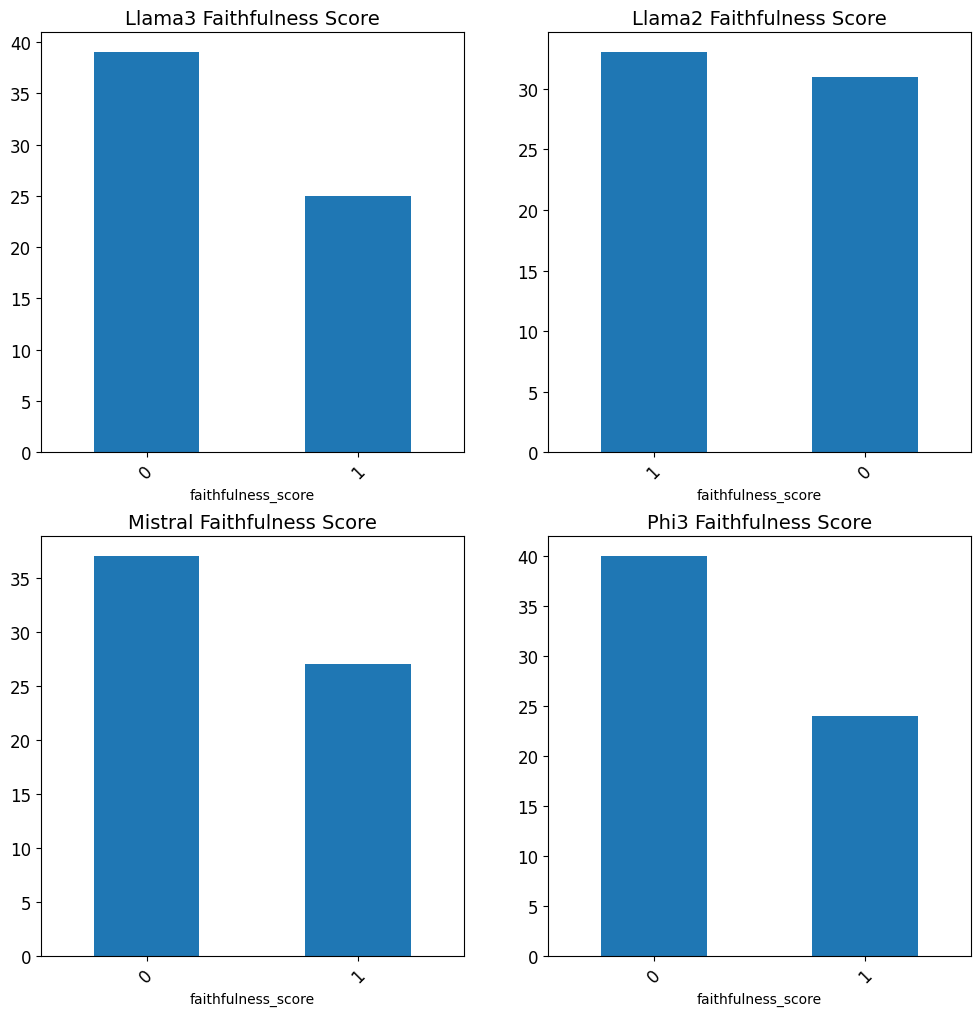

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  

datasets = ['llama3', 'llama2', 'mistral', 'phi3']
axes_positions = [(0, 0), (0, 1), (1, 0), (1, 1)]  

axes = axes.flatten()

for i, dataset in enumerate(datasets):
    faithfulness_counts = eval(f"{dataset}.faithfulness_score.value_counts()")
    faithfulness_counts.plot(kind="bar", ax=axes[i], title=f"{dataset.capitalize()} Faithfulness Score")

    axes[i].set_title(f"{dataset.capitalize()} Faithfulness Score", fontsize=14)

    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

plt.savefig('./faith_hm.png')
plt.show()



## <a id='toc5_2_'></a>[Context relevancy](#toc0_)

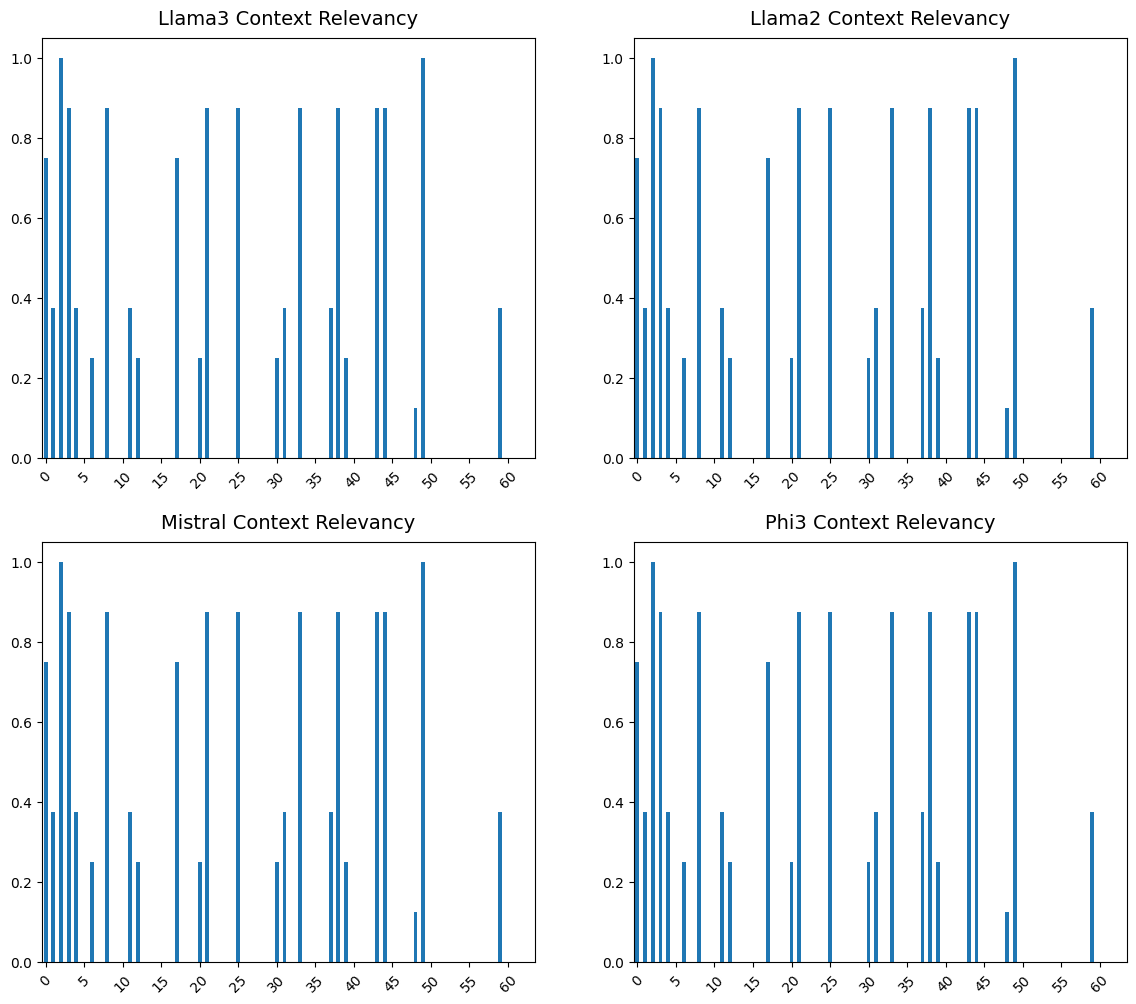

In [26]:
datasets = ['llama3', 'llama2', 'mistral', 'phi3']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))  
axes = axes.flatten()  

for i, dataset in enumerate(datasets):
    ax = getattr(eval(dataset), "context_relevancy_score").plot(kind="bar", ax=axes[i], title=f"{dataset.capitalize()} Context Relevancy")

    x_labels = ax.get_xticklabels()
    x_positions = range(len(x_labels))

    ax.set_xticks([x for i, x in enumerate(x_positions) if i % 5 == 0])  
    ax.set_xticklabels([label.get_text() for i, label in enumerate(x_labels) if i % 5 == 0], rotation=45)

    ax.set_title(f"{dataset.capitalize()} Context Relevancy", fontsize=14, pad=10)
    ax.tick_params(axis='both', labelsize=10)

plt.show()


In [27]:
for dataset in datasets:
    print(f"Dataset: {dataset} with mean: {getattr(eval(dataset), "context_relevancy_score").mean()}")

Dataset: llama3 with mean: 0.565
Dataset: llama2 with mean: 0.565
Dataset: mistral with mean: 0.565
Dataset: phi3 with mean: 0.565


## <a id='toc5_3_'></a>[Correctness](#toc0_)

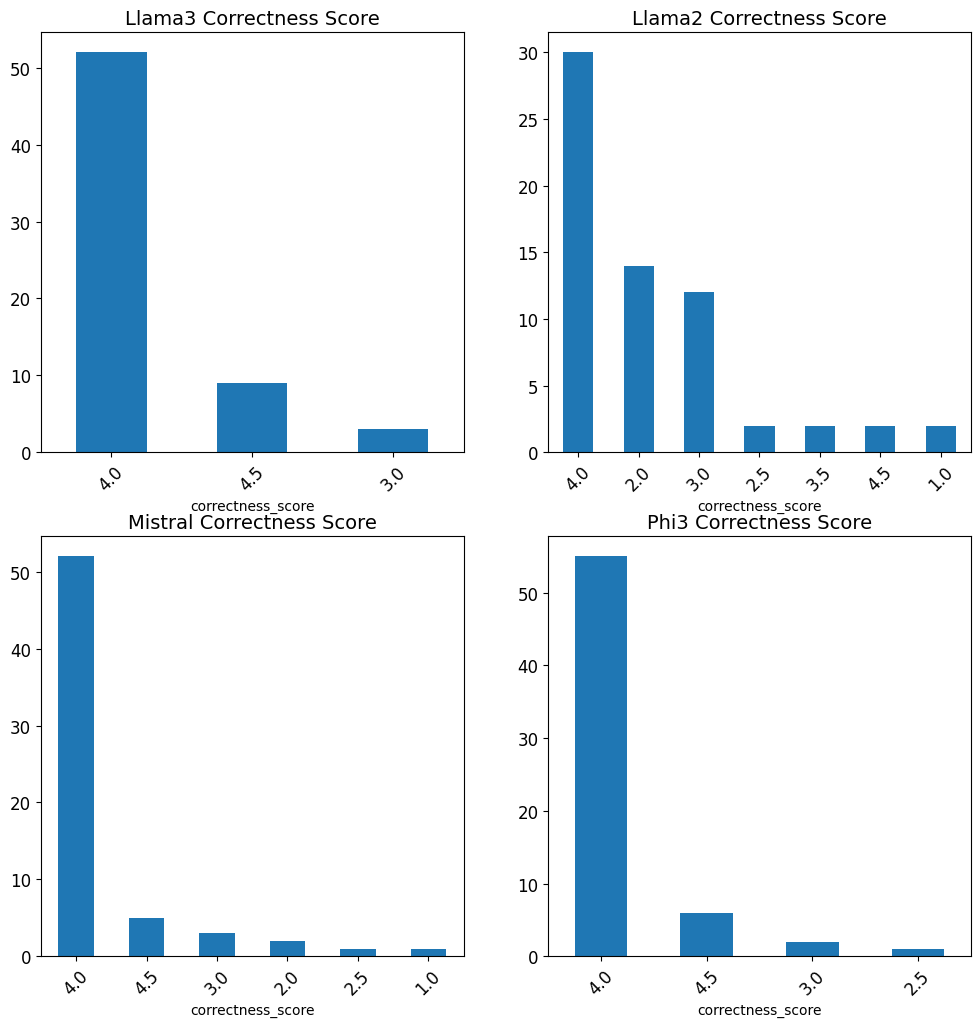

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  

datasets = ['llama3', 'llama2', 'mistral', 'phi3']
axes_positions = [(0, 0), (0, 1), (1, 0), (1, 1)]  

axes = axes.flatten()

for i, dataset in enumerate(datasets):
    faithfulness_counts = eval(f"{dataset}.correctness_score.value_counts()")
    faithfulness_counts.plot(kind="bar", ax=axes[i], title=f"{dataset.capitalize()} Faithfulness Score")

    axes[i].set_title(f"{dataset.capitalize()} Correctness Score", fontsize=14)

    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
plt.savefig('./correct_hm.png')

plt.show()

## <a id='toc5_4_'></a>[Semantic Similarity](#toc0_)

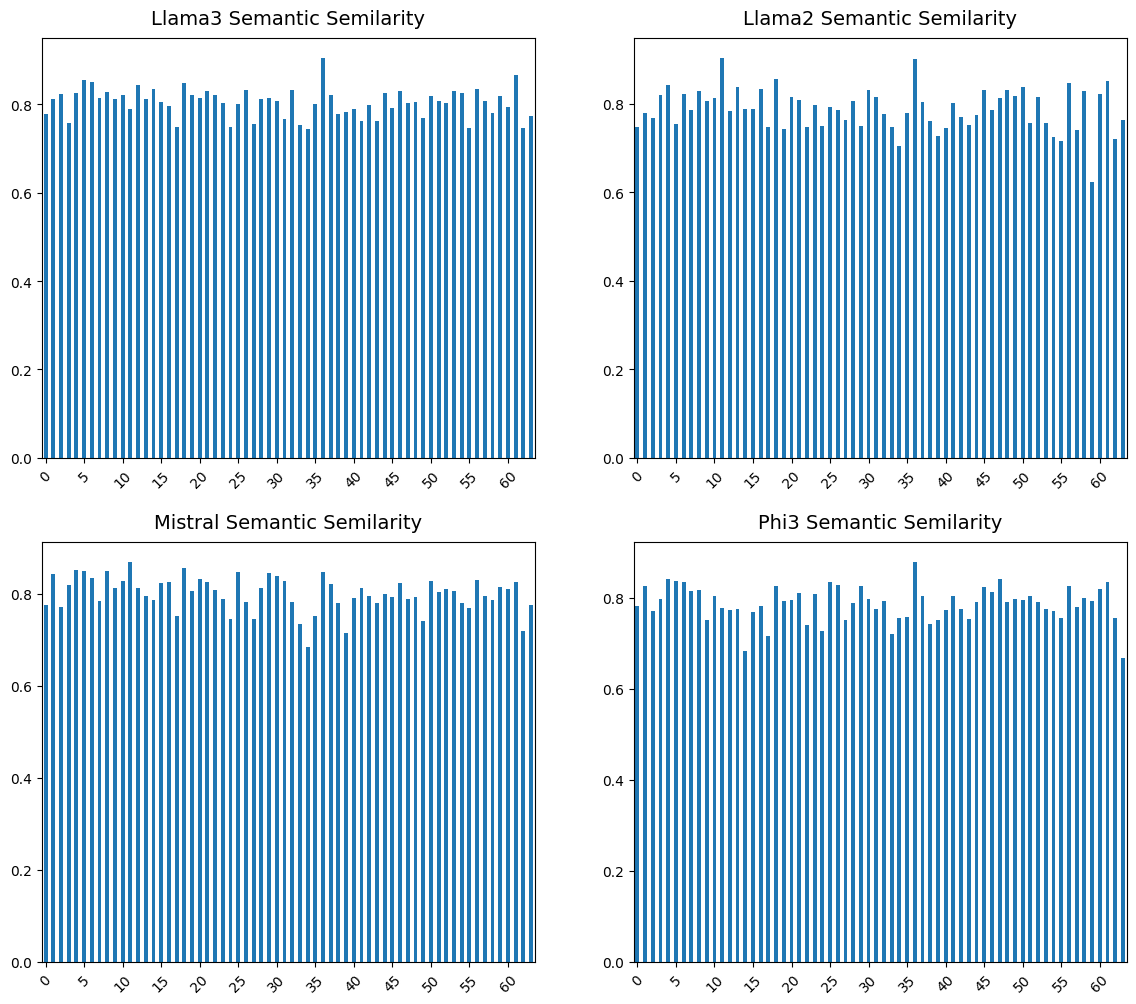

In [31]:
datasets = ['llama3', 'llama2', 'mistral', 'phi3']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))  
axes = axes.flatten()  

for i, dataset in enumerate(datasets):
    ax = getattr(eval(dataset), "semantic_semilarity_score").plot(kind="bar", ax=axes[i], title=f"{dataset.capitalize()} Semantic Semilarity")

    x_labels = ax.get_xticklabels()
    x_positions = range(len(x_labels))

    ax.set_xticks([x for i, x in enumerate(x_positions) if i % 5 == 0])  
    ax.set_xticklabels([label.get_text() for i, label in enumerate(x_labels) if i % 5 == 0], rotation=45)

    ax.set_title(f"{dataset.capitalize()} Semantic Semilarity", fontsize=14, pad=10)
    ax.tick_params(axis='both', labelsize=10)

plt.show()

In [32]:
for dataset in datasets:
    print(f"Dataset: {dataset} with mean: {getattr(eval(dataset), "semantic_semilarity_score").mean()}")

Dataset: llama3 with mean: 0.8044089858051001
Dataset: llama2 with mean: 0.7881726619584942
Dataset: mistral with mean: 0.8009135304776461
Dataset: phi3 with mean: 0.7878186073835028


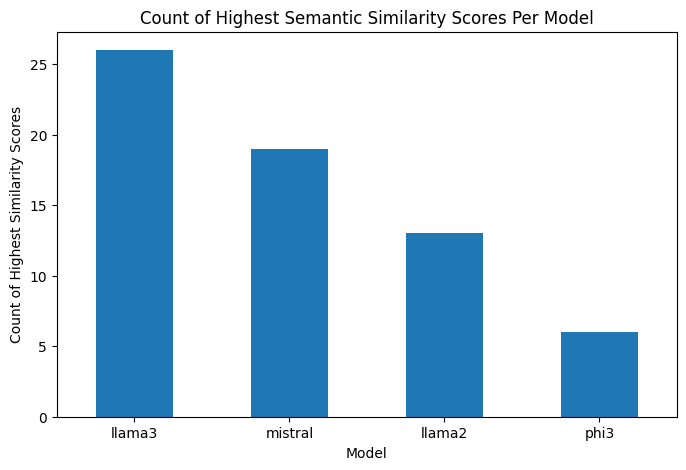

llama3     26
mistral    19
llama2     13
phi3        6
Name: count, dtype: int64


In [38]:
datasets = ['llama3', 'llama2', 'mistral', 'phi3']

semantic_df = pd.DataFrame({dataset: getattr(eval(dataset), "semantic_semilarity_score") for dataset in datasets})

highest_counts = semantic_df.idxmax(axis=1).value_counts()

plt.figure(figsize=(8, 5))
highest_counts.plot(kind='bar')

plt.xlabel("Model")
plt.ylabel("Count of Highest Similarity Scores")
plt.title("Count of Highest Semantic Similarity Scores Per Model")
plt.xticks(rotation=0)

plt.savefig('./highest_count_hm.jpg')
plt.show()
print(highest_counts)